In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset (replace 'your_dataset.csv' with the actual dataset file)
data = pd.read_csv('processed_data_PCA.csv')

# Assuming the last column is the target variable (y), and the rest are features (X)
X = data.drop('y', axis=1)  # Assuming 'y' is your target column
y = data['y']

# # Split into training and testing datasets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Example: Check the shape of the datasets
# print(f"X_train shape: {X_train.shape}")
# print(f"X_test shape: {X_test.shape}")

In [3]:
# from sklearn.model_selection import train_test_split

# # Split your data into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Further split the training data into training and validation sets (80% train, 20% validation)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Now you have X_train, X_val, and X_test, which you can use for training, validation, and testing.


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.model_selection import train_test_split

# Split your data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Build the model
model = Sequential()

# Input layer: Define the number of input features (adjust based on your dataset)
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))  # X_train should be your feature matrix
model.add(Dropout(0.3))  # Regularization using dropout

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Print model summary
model.summary()

# Training the model (adjust the epochs and batch size based on your dataset)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8711 - loss: 0.3961 - val_accuracy: 0.8913 - val_loss: 0.3159
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8873 - loss: 0.3213 - val_accuracy: 0.8966 - val_loss: 0.2915
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 890us/step - accuracy: 0.8911 - loss: 0.3082 - val_accuracy: 0.8967 - val_loss: 0.2864
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 880us/step - accuracy: 0.8909 - loss: 0.3027 - val_accuracy: 0.8987 - val_loss: 0.2824
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 925us/step - accuracy: 0.8927 - loss: 0.2970 - val_accuracy: 0.8969 - val_loss: 0.2836
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 904us/step - accuracy: 0.8924 - loss: 0.2953 - val_accuracy: 0.8942 - val_loss: 0.2882
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 876us/step - accuracy: 0.8937 - loss: 0.2875 - val_accuracy: 0.8956 - val_loss: 0.2828
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.8908 - loss: 0.2902 - val_

Training accuracy: 0.9080634713172913
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8874 - loss: 0.3215
Test accuracy: 0.8865295052528381
283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      7951
         1.0       0.56      0.28      0.37      1091

    accuracy                           0.89      9042
   macro avg       0.73      0.62      0.66      9042
weighted avg       0.87      0.89      0.87      9042

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


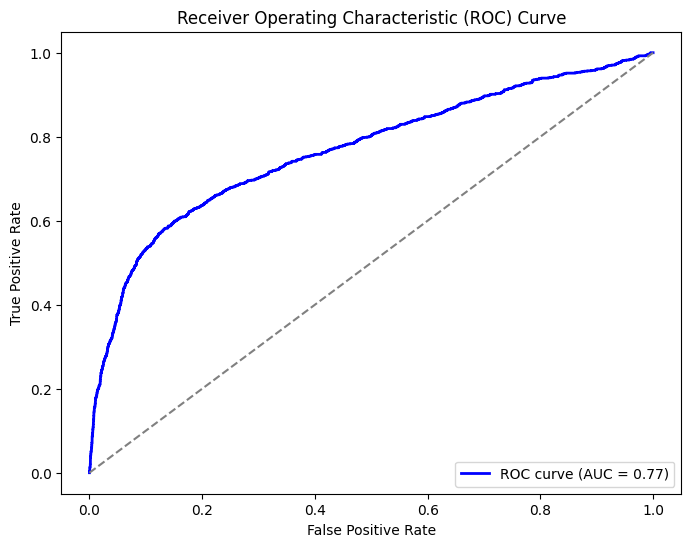

AUC: 0.77


In [5]:
# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on test data (X_test and y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

from sklearn.metrics import classification_report

# Predict the labels for the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set
y_prob = model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")



tunning

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch


# Split your data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Define the HyperModel class
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

        # First hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_1', min_value=64, max_value=256, step=32), 
                        activation='relu', input_dim=X_train.shape[1]))
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)))

        # Second hidden layer with hyperparameters for number of units and dropout rate
        model.add(Dense(units=hp.Int('units_2', min_value=64, max_value=256, step=32), 
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)))

        # Output layer
        model.add(Dense(1, activation='sigmoid'))

        # Hyperparameter for learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='LOG')),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        
        return model

# Initialize the Keras Tuner RandomSearch
tuner = RandomSearch(
    MyHyperModel(),
    objective='val_accuracy',  # Optimize for validation accuracy
    max_trials=10,              # Number of different models to try
    executions_per_trial=3,     # Number of times to train each model
    # directory='tuner_results',  # Directory to store the results
    # project_name='banking_model_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, 
             epochs=50, 
             batch_size=32,
             validation_data=(X_val, y_val))

# Get the best model found by the tuner
best_model = tuner.get_best_models(1)[0]

# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy of the best model: {test_accuracy}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")


Trial 10 Complete [00h 01m 57s]
val_accuracy: 0.8974748849868774

Best val_accuracy So Far: 0.898304283618927
Total elapsed time: 00h 20m 45s


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - accuracy: 0.8913 - loss: 0.2877
Test accuracy of the best model: 0.8919486999511719
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.30000000000000004, 'units_2': 160, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0004789261577663581}


Epoch 1/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 2s 935us/step - accuracy: 0.8983 - loss: 0.2777 - val_accuracy: 0.8967 - val_loss: 0.2800
Epoch 2/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.8976 - loss: 0.2753 - val_accuracy: 0.8960 - val_loss: 0.2795
Epoch 3/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 883us/step - accuracy: 0.8996 - loss: 0.2723 - val_accuracy: 0.8963 - val_loss: 0.2788
Epoch 4/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - accuracy: 0.9034 - loss: 0.2708 - val_accuracy: 0.8959 - val_loss: 0.2800
Epoch 5/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 915us/step - accuracy: 0.9022 - loss: 0.2668 - val_accuracy: 0.8970 - val_loss: 0.2802
Epoch 6/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 986us/step - accuracy: 0.9022 - loss: 0.2651 - val_accuracy: 0.8966 - val_loss: 0.2817
Epoch 7/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 875us/step - accuracy: 0.8990 - loss: 0.2695 - val_accuracy: 0.8959 - val_loss: 0.2807
Epoch 8/50
905/905 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.8987 - loss: 0.2689 - 

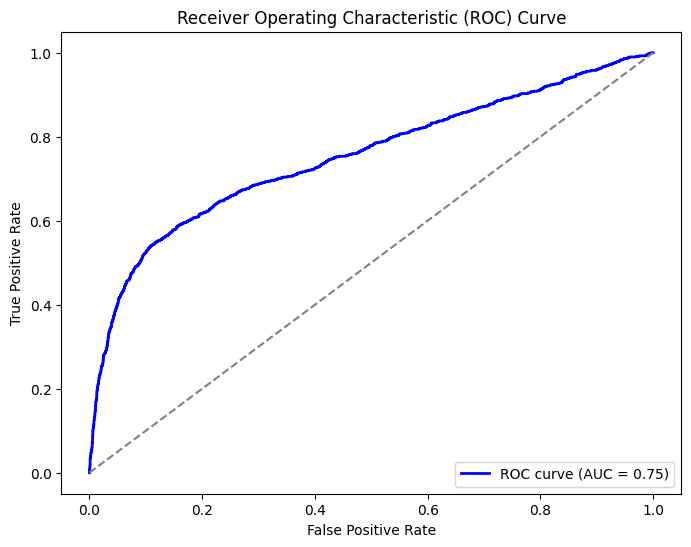

AUC: 0.75
Best hyperparameters: {'units_1': 160, 'dropout_1': 0.30000000000000004, 'units_2': 160, 'dropout_2': 0.30000000000000004, 'learning_rate': 0.0004789261577663581}


In [7]:
# Get the history of the best model's training
history = best_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Get training accuracy from the history object
print("Training accuracy:", history.history['accuracy'][-1])  # Accuracy of the last epoch

# Evaluate the model on the test data (X_test and y_test)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict the labels for the test set
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary labels

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Predict probabilities for the test set (for ROC curve)
y_prob = best_model.predict(X_test)

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f"AUC: {roc_auc:.2f}")

# You can also print the best hyperparameters found
best_hyperparameters = tuner.get_best_hyperparameters(1)[0]
print(f"Best hyperparameters: {best_hyperparameters.values}")

other model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report

# Build Neural Network Model
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile Model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the Model
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)

# Predictions
nn_test_preds = (nn_model.predict(X_test) > 0.5).astype("int32")

nn_ten =accuracy_score(y_test, nn_test_preds)

# Evaluation
print("Neural Network - Testing Accuracy:", nn_ten)
print("\nClassification Report (Testing):\n", classification_report(y_test, nn_test_preds))


Epoch 1/50


c:\Users\wasif\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


724/724 ━━━━━━━━━━━━━━━━━━━━ 2s 966us/step - accuracy: 0.8717 - loss: 0.3511 - val_accuracy: 0.8955 - val_loss: 0.3049
Epoch 2/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 873us/step - accuracy: 0.8892 - loss: 0.2984 - val_accuracy: 0.8977 - val_loss: 0.2828
Epoch 3/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 848us/step - accuracy: 0.8921 - loss: 0.2923 - val_accuracy: 0.8956 - val_loss: 0.2836
Epoch 4/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 806us/step - accuracy: 0.8949 - loss: 0.2885 - val_accuracy: 0.8963 - val_loss: 0.2756
Epoch 5/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 888us/step - accuracy: 0.8927 - loss: 0.2888 - val_accuracy: 0.8967 - val_loss: 0.2763
Epoch 6/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.8950 - loss: 0.2856 - val_accuracy: 0.8972 - val_loss: 0.2809
Epoch 7/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 835us/step - accuracy: 0.8936 - loss: 0.2822 - val_accuracy: 0.8937 - val_loss: 0.2786
Epoch 8/50
724/724 ━━━━━━━━━━━━━━━━━━━━ 1s 807us/step - accuracy: 0.8966 - loss: 0.2738 - val_accurac